In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# path
path_prefix = 'D:/USA 2020 summer/visual_internship/ANZ'

# 1.1 Explore correlations

In [43]:
#load data that is clean.
df = pd.read_csv(os.path.join(path_prefix, 'Task1_0731/df_clean.csv'))
df = df.drop(columns=['Unnamed: 0'])
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,monthly,weekday,hour,account_customer,clong,clat,mlong,mlat,In_Australia,dist
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,153.38,-27.99,True,5.335071
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,151.21,-33.87,True,690.864475
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,8,2,1,ACC-1222300524_CUS-2142601169,151.23,-33.94,151.21,-33.87,True,7.999496
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,8,2,1,ACC-1037050564_CUS-1614226872,153.10,-27.66,153.05,-26.68,True,109.083222
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,8,2,1,ACC-1598451071_CUS-2487424745,153.41,-27.95,153.44,-28.06,True,12.581042


In [44]:
# group by customer_id
df_salary = df[df["txn_description"]==("PAY/SALARY")]
df_customer = pd.pivot_table(df_salary, index='customer_id', values=["amount"])
df_customer['age'] = pd.pivot_table(df, index='customer_id', values=["age"])
df_purchase = df[df["txn_description"]==('POS' or "SALES-POS")]
df_customer['avg_purchase_transaction'] = pd.pivot_table(df_purchase, index='customer_id', values=["amount"])
df_purchase_amount = pd.pivot_table(df_purchase, values="amount", index="customer_id", columns="monthly", aggfunc =sum, fill_value= 0)
df_purchase_amount = df_purchase_amount.reset_index()
df_customer["avg_purchase_monthly"] = [sum(df_purchase_amount.loc[x,[8,9,10]])/3 for x in range(len(df_purchase_amount))]
df_customer["purchase_ratio"] = df_customer["avg_purchase_monthly"]/df_customer["amount"]
df_customer

,amount,age,avg_purchase_transaction,avg_purchase_monthly,purchase_ratio
customer_id,,,,,
CUS-1005756958,970.47,53,28.769615,249.336667,0.256924
CUS-1117979751,3578.65,21,23.321923,202.123333,0.056480
CUS-1140341822,1916.51,28,34.781282,452.156667,0.235927
CUS-1147642491,1711.39,34,54.271316,687.436667,0.401683
CUS-1196156254,3903.73,34,31.157432,768.550000,0.196876
...,...,...,...,...,...
CUS-72755508,725.32,35,25.022143,116.770000,0.160991
CUS-809013380,1037.07,21,22.255098,378.336667,0.364813
CUS-860700529,1808.62,30,28.164845,910.663333,0.503513


In [45]:
#drop the outlier
df_customer= df_customer[df_customer.amount.between(df_customer.amount.quantile(.05),df_customer.amount.quantile(.95))]
df_customer= df_customer[df_customer.avg_purchase_monthly.between(df_customer.avg_purchase_monthly.quantile(.05),df_customer.avg_purchase_monthly.quantile(.95))]
df_customer

,amount,age,avg_purchase_transaction,avg_purchase_monthly,purchase_ratio
customer_id,,,,,
CUS-1005756958,970.47,53,28.769615,249.336667,0.256924
CUS-1117979751,3578.65,21,23.321923,202.123333,0.056480
CUS-1140341822,1916.51,28,34.781282,452.156667,0.235927
CUS-1147642491,1711.39,34,54.271316,687.436667,0.401683
CUS-1196156254,3903.73,34,31.157432,768.550000,0.196876
...,...,...,...,...,...
CUS-586638664,1952.29,18,25.039524,350.553333,0.179560
CUS-809013380,1037.07,21,22.255098,378.336667,0.364813
CUS-860700529,1808.62,30,28.164845,910.663333,0.503513


Text(0.5, 1.0, 'Salary vs age')

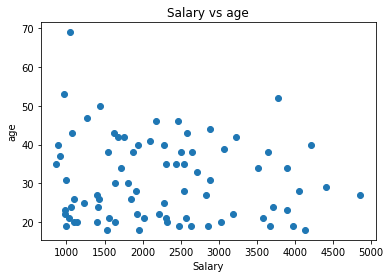

In [46]:
#scatter plot
plt.xlabel('Salary')
plt.ylabel('age')
plt.scatter(df_customer["amount"], df_customer["age"])
plt.title('Salary vs age')

Text(0.5, 1.0, 'Salary vs Amount of Purchase per transaction')

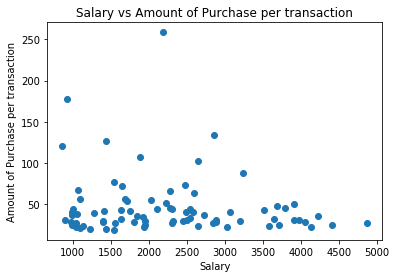

In [47]:
plt.xlabel('Salary')
plt.ylabel('Amount of Purchase per transaction')
plt.scatter(df_customer["amount"], df_customer["avg_purchase_transaction"])
plt.title('Salary vs Amount of Purchase per transaction')

Text(0.5, 1.0, 'Salary vs Amount of Purchase per month')

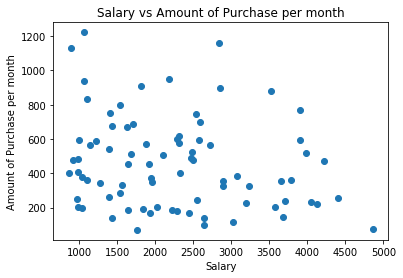

In [48]:
plt.xlabel('Salary')
plt.ylabel('Amount of Purchase per month')
plt.scatter(df_customer["amount"], df_customer["avg_purchase_monthly"])
plt.title('Salary vs Amount of Purchase per month')

Text(0.5, 1.0, 'Salary vs Ratio of Purchase')

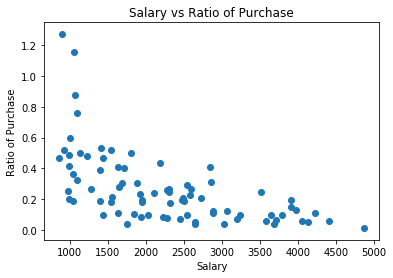

In [49]:
plt.xlabel('Salary')
plt.ylabel('Ratio of Purchase')
plt.scatter(df_customer["amount"], df_customer["purchase_ratio"])
plt.title('Salary vs Ratio of Purchase')

### According to the above scatter plots, we can see age, the amount of purchase monthly, and ratio of purchase have correlation with Salary.  

# 1.2 Simple Regression Model

Text(0.5, 1.0, 'Salary')

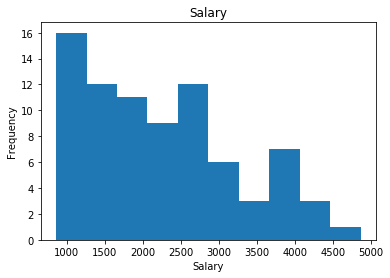

In [50]:
#Check Normalization
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.hist(df_customer.amount)
plt.title("Salary")

Text(0.5, 1.0, 'Age')

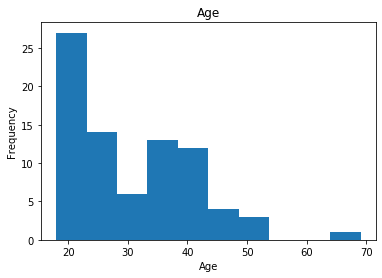

In [51]:
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(df_customer.age)
plt.title("Age")

Text(0.5, 1.0, 'Purchase per month')

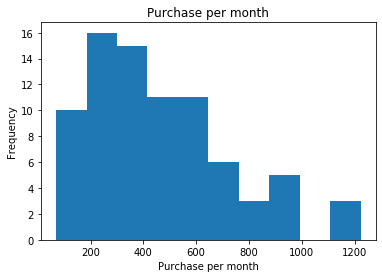

In [52]:
plt.xlabel('Purchase per month')
plt.ylabel('Frequency')
plt.hist(df_customer.avg_purchase_monthly)
plt.title("Purchase per month")

Text(0.5, 1.0, 'Ratio of Purchase')

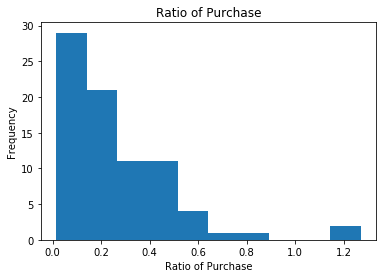

In [53]:
plt.xlabel('Ratio of Purchase')
plt.ylabel('Frequency')
plt.hist(df_customer.purchase_ratio)
plt.title("Ratio of Purchase")

In [54]:
#Normalization
df_customer['Salary_Log'] = df_customer['amount']**(1/2)
df_customer['age_LOG'] = df_customer['age']**(1/2)
df_customer['avg_purchase_monthly_LOG'] = df_customer['avg_purchase_monthly']**(1/2)
df_customer['purchase_ratio_LOG'] = df_customer['purchase_ratio']**(1/2)

Text(0.5, 1.0, 'Salary')

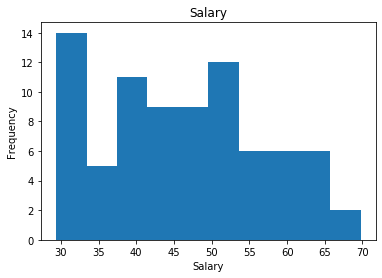

In [55]:
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.hist(df_customer.Salary_Log)
plt.title("Salary")

Text(0.5, 1.0, 'Age')

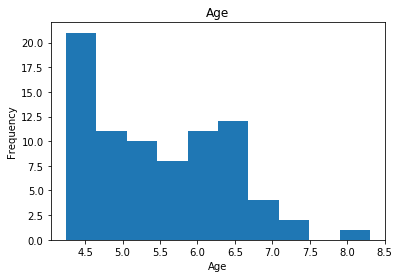

In [56]:
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(df_customer.age_LOG)
plt.title("Age")

Text(0.5, 1.0, 'Purchase per month')

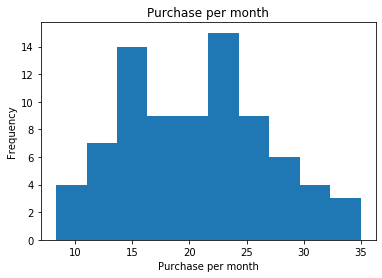

In [57]:
plt.xlabel('Purchase per month')
plt.ylabel('Frequency')
plt.hist(df_customer.avg_purchase_monthly_LOG)
plt.title("Purchase per month")

Text(0.5, 1.0, 'Ratio of Purchase')

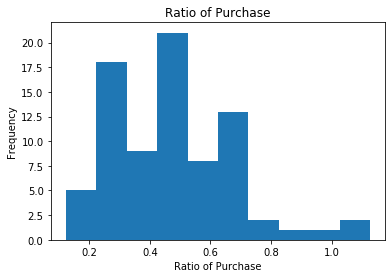

In [58]:
plt.xlabel('Ratio of Purchase')
plt.ylabel('Frequency')
plt.hist(df_customer.purchase_ratio_LOG)
plt.title("Ratio of Purchase")

In [59]:
target = df_customer[['Salary_Log']]
df_customer_vars = df_customer[['age_LOG', 'avg_purchase_monthly_LOG', 'purchase_ratio_LOG']]

In [60]:
# Split into train vs. test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_customer_vars_scaled = scaler.fit_transform(df_customer_vars)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_customer_vars_scaled, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [61]:
from sklearn import linear_model
# Create an object that is an ols regression
ols = linear_model.LinearRegression()
# Train the model using our training data
linear_model = ols.fit(x_train, y_train)

In [62]:
linear_model.coef_

array([[ -0.27913347,  11.42090276, -16.99567094]])

In [63]:
#R square error
("Training:", linear_model.score(x_train, y_train),"Testing:", linear_model.score(x_test, y_test)) 

('Training:', 0.8330947675711675, 'Testing:', 0.8305779679278906)

In [64]:
y_test_plot = y_test
y_test_plot['linear_preds'] = linear_model.predict(x_test)
y_test_plot

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Salary_Log,linear_preds
customer_id,,
CUS-3716701010,35.671697,38.415258
CUS-2083971310,53.726344,53.656757
CUS-2283904812,47.103397,49.499822
CUS-443776336,31.473004,30.397312
CUS-3117610635,52.139333,53.795371
CUS-3129499595,31.563270,28.179738
CUS-325142416,48.027388,50.865068
CUS-55310383,40.456396,45.219112
CUS-2650223890,29.376011,27.651588


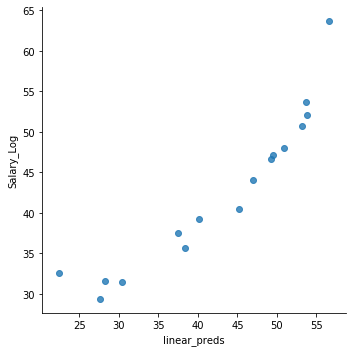

In [65]:
import seaborn as sns
sns.lmplot('linear_preds', 'Salary_Log', data=y_test_plot, fit_reg=False)

### Using the r square to evaluate the model, and getting 0.83. As we can see, there are not overfitting. In my opinion,  ANZ can identify the customers' income level by their ratio of purchase and the amount of purchase.  

# 1.3 Decision-tree

In [80]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 3,random_state=0)
decisiontree_model = dtr.fit(x_train, y_train)

In [81]:
decisiontree_model.feature_importances_

array([0.01102117, 0.30139434, 0.68758449])

In [82]:
#R square error
("Training:", decisiontree_model.score(x_train, y_train),"Testing:", decisiontree_model.score(x_test, y_test['Salary_Log'])) 

('Training:', 0.8098741382425696, 'Testing:', 0.44536341545814345)

In [83]:
y_test_plot['decisiontree_preds'] = decisiontree_model.predict(x_test)
y_test_plot

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Salary_Log,linear_preds,decisiontree_preds
customer_id,,,
CUS-3716701010,35.671697,38.415258,35.155156
CUS-2083971310,53.726344,53.656757,61.925797
CUS-2283904812,47.103397,49.499822,45.033288
CUS-443776336,31.473004,30.397312,35.069925
CUS-3117610635,52.139333,53.795371,48.747952
CUS-3129499595,31.563270,28.179738,35.069925
CUS-325142416,48.027388,50.865068,48.747952
CUS-55310383,40.456396,45.219112,45.033288
CUS-2650223890,29.376011,27.651588,35.069925


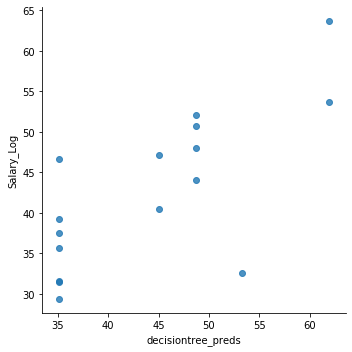

In [84]:
sns.lmplot('decisiontree_preds', 'Salary_Log', data=y_test_plot, fit_reg=False)

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_model = rf.fit(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
rf_model.feature_importances_

array([0.0533648 , 0.28601881, 0.66061639])

In [87]:
#R square error
("Training:", rf_model.score(x_train, y_train),"Testing:", rf_model.score(x_test, y_test['Salary_Log'])) 

('Training:', 0.9603413107235051, 'Testing:', 0.8959376028016519)

In [88]:
y_test_plot['rf_preds'] = rf_model.predict(x_test)
y_test_plot

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Salary_Log,linear_preds,decisiontree_preds,rf_preds
customer_id,,,,
CUS-3716701010,35.671697,38.415258,35.155156,37.272225
CUS-2083971310,53.726344,53.656757,61.925797,58.620237
CUS-2283904812,47.103397,49.499822,45.033288,45.669148
CUS-443776336,31.473004,30.397312,35.069925,34.567192
CUS-3117610635,52.139333,53.795371,48.747952,49.010166
CUS-3129499595,31.563270,28.179738,35.069925,35.532015
CUS-325142416,48.027388,50.865068,48.747952,47.043657
CUS-55310383,40.456396,45.219112,45.033288,42.926458
CUS-2650223890,29.376011,27.651588,35.069925,33.311250


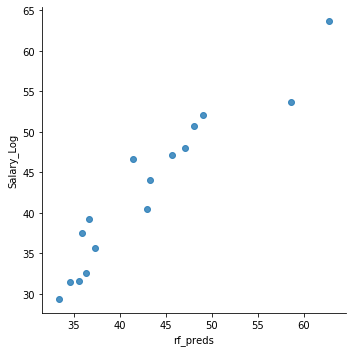

In [89]:
sns.lmplot('rf_preds', 'Salary_Log', data=y_test_plot, fit_reg=False)

###  It is perform better by using Random Forest model. Using the r square to evaluate the model, and getting 0.96. However, as we can seen, it is a little big overfitting. At begining, I split the data set into two data set: training and test. In the end of training, drawing a scattor plot observate the linear to evaluate the performance of this model. 